In [93]:
import os
from collections import defaultdict
import yaml

def collect_arch(arch):
    __file__ = "collect.ipynb"
    THIS_SCRIPT_DIR = os.path.abspath(os.path.dirname(os.path.realpath(__file__)))
    RESULTS_DIR = os.path.join(THIS_SCRIPT_DIR, "example_designs", arch, "outputs")

    energies = defaultdict(lambda:0)
    areas = defaultdict(lambda:0)
    cycles = defaultdict(lambda:0)
    utilizations = defaultdict(lambda:0)
    total_energies = defaultdict(lambda:0)
    
    for layer in os.listdir(RESULTS_DIR):
        if layer.startswith(".ipynb"):
            continue
        ## COLLECT ENERGY 
        
        model = layer.split("_")[0]
        file = os.path.join(RESULTS_DIR, layer, "timeloop-mapper.stats.txt")
        summary = open(file, "r").read().split("-------------")[-1]
        summary = summary.split("\n")
        utilization = summary[2].split(":")[-1]
        cycle = float(summary[3].split(":")[-1])
        total_energy = float(summary[4].split(" ")[1])
        energy_value = float(summary[-3].split("=")[-1])
        energies[layer] = energy_value
        utilizations[layer] = float(utilization.rstrip("%"))
        cycles[layer] = cycle
        total_energies[layer] = total_energy
        if areas[model]:
            continue
        art_file = os.path.join(RESULTS_DIR, layer, "timeloop-mapper.ART_summary.yaml")
        data = yaml.load(open(art_file, 'r'), Loader=yaml.SafeLoader)
        for elt in data["ART_summary"]["table_summary"]:
            areas[model] += elt["area"]    
    
    return energies, cycles, utilizations, total_energies, areas

In [94]:
eyeriss_energies, eyeriss_cycles, eyeriss_utilization, eyeriss_total_energy, eyeriss_areas = collect_arch("eyeriss_like")
simba_energies, simba_cycles, simba_utilization, simba_total_energy, simba_areas = collect_arch("simba_like")
simple_weight_energies, simple_weight_cycles, simple_weight_utilization, simple_weight_total_energy, simple_weight_areas = collect_arch("simple_weight_stationary")
simple_output_energies, simple_output_cycles, simple_output_utilization, simple_output_total_energy, simple_output_areas = collect_arch("simple_output_stationary")

Layer Eyeriss Energy | Simba Energy | Weight Stationary | Output Stationary
gpt2_000 6463.2 | 20172.36 | 6739.98 | 5152.31
gpt2_001 1869.46 | 8005.65 | 2322.21 | 1741.76
gpt2_002 3.34 | 10.88 | 3.49 | 3.69
gpt2_003 10.93 | 27.0 | 14.97 | 13.63
gpt2_004 7191.71 | 42224.38 | 7243.48 | 6317.84
gpt2_005 7390.62 | 26877.26 | 8622.95 | 7614.86
gpt2_006 6463.2 | 20172.36 | 6739.98 | 5152.31
gpt2_007 1869.46 | 8005.65 | 2322.21 | 1741.76
gpt2_008 3.34 | 10.88 | 3.49 | 3.69
gpt2_009 10.93 | 27.0 | 14.97 | 13.63
gpt2_010 7191.71 | 42224.38 | 7243.48 | 6317.84
gpt2_011 7390.62 | 26877.26 | 8622.95 | 7614.86
gpt2_012 6463.2 | 20172.36 | 6739.98 | 5152.31
gpt2_013 1869.46 | 8005.65 | 2322.21 | 1741.76
gpt2_014 3.34 | 10.88 | 3.49 | 3.69
gpt2_015 10.93 | 27.0 | 14.97 | 13.63
gpt2_016 7191.71 | 42224.38 | 7243.48 | 6317.84
gpt2_017 7390.62 | 26877.26 | 8622.95 | 7614.86
gpt2_018 6463.2 | 20172.36 | 6739.98 | 5152.31
gpt2_019 1869.46 | 8005.65 | 2322.21 | 1741.76
gpt2_020 3.34 | 10.88 | 3.49 | 3.69
gp

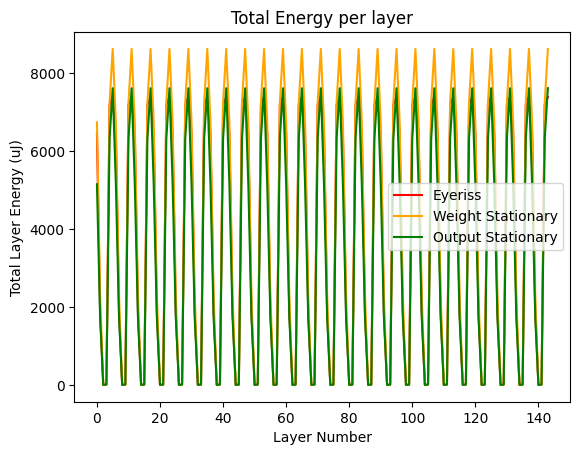

In [105]:
import matplotlib.pyplot as plt

print("Layer", "Eyeriss Energy |", "Simba Energy |", "Weight Stationary |", "Output Stationary")
totals = defaultdict(lambda:0)
eyeriss = []
simba = []
weight = []
output = []
layer = []
for key in eyeriss_total_energy:
    if key.startswith("gpt"):
        print(key, eyeriss_total_energy[key], "|", simba_total_energy[key], "|", simple_weight_total_energy[key], "|", simple_output_total_energy[key])
        if int(key.split("_")[-1]) == 144:
            continue
        eyeriss.append(eyeriss_total_energy[key])
        simba.append(simba_total_energy[key])
        weight.append(simple_weight_total_energy[key])
        output.append(simple_output_total_energy[key])
        layer.append(int(key.split("_")[-1]))
        totals["eyeriss"] += eyeriss_total_energy[key]
        totals["simba"] += simba_total_energy[key]
        totals["weight"] += simple_weight_total_energy[key]
        totals["output"] += simple_output_total_energy[key]


plt.plot(layer, eyeriss, color = "red",  label = "Eyeriss")
# plt.plot(layer, simba, color = "blue",  label = "Simba")
plt.plot(layer, weight, color = "orange",  label = "Weight Stationary")
plt.plot(layer, output, color = "green",  label = "Output Stationary")
plt.xlabel('Layer Number')
plt.ylabel('Total Layer Energy (uJ)')
plt.title('Total Energy per layer')
plt.legend()


print(" ")
for key in totals:
    print(key, ": ", totals[key])
    

Layer Eyeriss Energy | Simba Energy | Weight Stationary | Output Stationary
gpt2_000 7.14 | 50.0 | 6.25 | 6.25
gpt2_001 4.76 | 25.0 | 6.25 | 6.25
gpt2_002 4.76 | 50.0 | 6.25 | 6.25
gpt2_003 4.76 | 25.0 | 6.25 | 6.25
gpt2_004 4.76 | 100.0 | 6.25 | 6.25
gpt2_005 4.76 | 100.0 | 6.25 | 6.25
gpt2_006 7.14 | 50.0 | 6.25 | 6.25
gpt2_007 4.76 | 25.0 | 6.25 | 6.25
gpt2_008 4.76 | 50.0 | 6.25 | 6.25
gpt2_009 4.76 | 25.0 | 6.25 | 6.25
gpt2_010 4.76 | 100.0 | 6.25 | 6.25
gpt2_011 4.76 | 100.0 | 6.25 | 6.25
gpt2_012 7.14 | 50.0 | 6.25 | 6.25
gpt2_013 4.76 | 25.0 | 6.25 | 6.25
gpt2_014 4.76 | 50.0 | 6.25 | 6.25
gpt2_015 4.76 | 25.0 | 6.25 | 6.25
gpt2_016 4.76 | 100.0 | 6.25 | 6.25
gpt2_017 4.76 | 100.0 | 6.25 | 6.25
gpt2_018 7.14 | 50.0 | 6.25 | 6.25
gpt2_019 4.76 | 25.0 | 6.25 | 6.25
gpt2_020 4.76 | 50.0 | 6.25 | 6.25
gpt2_021 4.76 | 25.0 | 6.25 | 6.25
gpt2_022 4.76 | 100.0 | 6.25 | 6.25
gpt2_023 4.76 | 100.0 | 6.25 | 6.25
gpt2_024 7.14 | 50.0 | 6.25 | 6.25
gpt2_025 4.76 | 25.0 | 6.25 | 6.25
gpt2_0

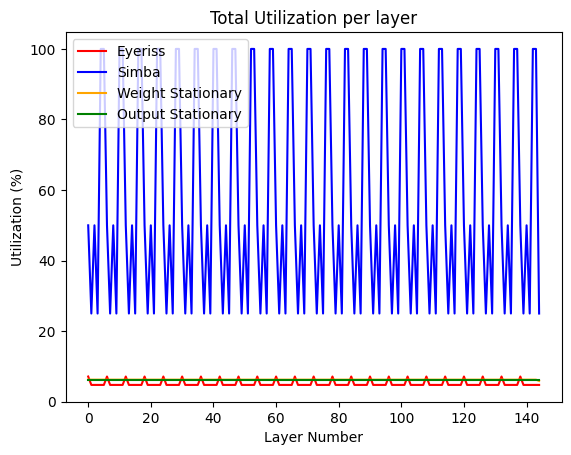

In [100]:
print("Layer", "Eyeriss Energy |", "Simba Energy |", "Weight Stationary |", "Output Stationary")
eyeriss = []
simba = []
weight = []
output = []
layer = [] 
for key in eyeriss_utilization:
    if key.startswith("gpt"):
        print(key, eyeriss_utilization[key], "|", simba_utilization[key], "|", simple_weight_utilization[key], "|", simple_output_utilization[key])
        eyeriss.append(eyeriss_utilization[key])
        simba.append(simba_utilization[key])
        weight.append(simple_weight_utilization[key])
        output.append(simple_output_utilization[key])
        layer.append(int(key.split("_")[-1]))

plt.plot(layer, eyeriss, color = "red",  label = "Eyeriss")
plt.plot(layer, simba, color = "blue",  label = "Simba")
plt.plot(layer, weight, color = "orange",  label = "Weight Stationary")
plt.plot(layer, output, color = "green",  label = "Output Stationary")
plt.xlabel('Layer Number')
plt.ylabel('Utilization (%)')
plt.title('Total Utilization per layer')
plt.legend()

Layer Eyeriss Energy | Simba Energy | Weight Stationary | Output Stationary
gpt2_000 67108864.0 | 6291456.0 | 50331648.0 | 50331648.0
gpt2_001 33554432.0 | 4194304.0 | 16777216.0 | 16777216.0
gpt2_002 32768.0 | 2048.0 | 16384.0 | 16384.0
gpt2_003 131072.0 | 16384.0 | 65536.0 | 65536.0
gpt2_004 134217728.0 | 4194304.0 | 67108864.0 | 67108864.0
gpt2_005 134217728.0 | 4194304.0 | 67108864.0 | 67108864.0
gpt2_006 67108864.0 | 6291456.0 | 50331648.0 | 50331648.0
gpt2_007 33554432.0 | 4194304.0 | 16777216.0 | 16777216.0
gpt2_008 32768.0 | 2048.0 | 16384.0 | 16384.0
gpt2_009 131072.0 | 16384.0 | 65536.0 | 65536.0
gpt2_010 134217728.0 | 4194304.0 | 67108864.0 | 67108864.0
gpt2_011 134217728.0 | 4194304.0 | 67108864.0 | 67108864.0
gpt2_012 67108864.0 | 6291456.0 | 50331648.0 | 50331648.0
gpt2_013 33554432.0 | 4194304.0 | 16777216.0 | 16777216.0
gpt2_014 32768.0 | 2048.0 | 16384.0 | 16384.0
gpt2_015 131072.0 | 16384.0 | 65536.0 | 65536.0
gpt2_016 134217728.0 | 4194304.0 | 67108864.0 | 67108864.0

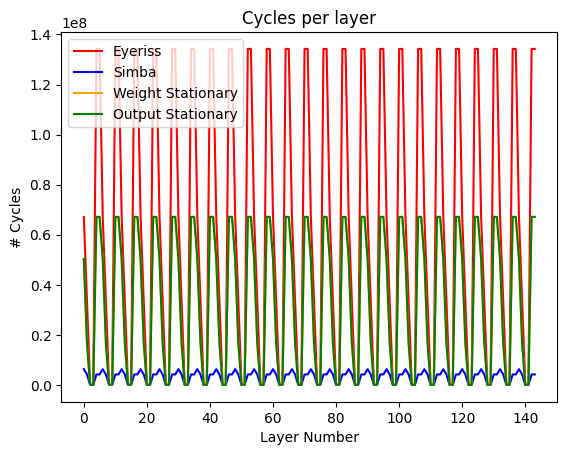

In [102]:
print("Layer", "Eyeriss Energy |", "Simba Energy |", "Weight Stationary |", "Output Stationary")
eyeriss = []
simba = []
weight = []
output = []
layer = []
for key in eyeriss_cycles:
    if key.startswith("gpt"):
        print(key, eyeriss_cycles[key], "|", simba_cycles[key], "|", simple_weight_cycles[key], "|", simple_output_cycles[key])
        if int(key.split("_")[-1]) == 144:
            continue
        eyeriss.append(eyeriss_cycles[key])
        simba.append(simba_cycles[key])
        weight.append(simple_weight_cycles[key])
        output.append(simple_output_cycles[key])
        layer.append(int(key.split("_")[-1]))



plt.plot(layer, eyeriss, color = "red",  label = "Eyeriss")
plt.plot(layer, simba, color = "blue",  label = "Simba")
plt.plot(layer, weight, color = "orange",  label = "Weight Stationary")
plt.plot(layer, output, color = "green",  label = "Output Stationary")
plt.xlabel('Layer Number')
plt.ylabel('# Cycles')
plt.title('Cycles per layer')
plt.legend()

In [82]:
for key in simba_areas:
    print(key, ":", simba_areas[key])

alexnet : 5803472.798943999
gpt2 : 5803472.798943999
mobilenet : 5803472.798943999
resnet18 : 5803472.798943999
